In [2]:
import numpy as np
import pandas as pd
import re

chinese =  pd.read_csv('data/chinese.csv',encoding='utf-8',header=0,keep_default_na=False)
english =  pd.read_csv('data/native.csv',encoding='utf-8',header=0,keep_default_na=False)
chinese.head()

,index,sentence,谓语数目,非谓语数目,副词个数,从句个数,插入语个数,复合句,简单句,并列句,被动,连词,label
0,1,Protein structure prediction has been an impor...,1,0,0,0,0,0,1,0,0,0,0
1,2,Predicting the three-dimensional structure of...,1,2,1,0,0,0,1,0,0,0,0
2,3,Both experimental and computational approaches...,1,1,0,0,0,0,1,0,1,1,0
3,4,The experimental approach allows\nfor more ac...,1,0,0,0,0,0,1,1,0,1,0
4,5,The computational approach can predict protein...,2,1,0,0,0,0,0,1,0,1,0


In [3]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelBinarizer


train_data = pd.concat([chinese,english], ignore_index=True)


In [4]:
train_data["副词个数"] = pd.to_numeric(train_data["副词个数"], errors='coerce').fillna(0, downcast='infer')
train_data["谓语数目"] = pd.to_numeric(train_data["谓语数目"], errors='coerce').fillna(0, downcast='infer')
train_data["非谓语数目"] = pd.to_numeric(train_data["非谓语数目"], errors='coerce').fillna(0, downcast='infer')
train_data["从句个数"] = pd.to_numeric(train_data["从句个数"], errors='coerce').fillna(0, downcast='infer')
train_data["插入语个数"] = pd.to_numeric(train_data["插入语个数"], errors='coerce').fillna(0, downcast='infer')
train_data["复合句"] = pd.to_numeric(train_data["复合句"], errors='coerce').fillna(0, downcast='infer')
train_data["简单句"] = pd.to_numeric(train_data["简单句"], errors='coerce').fillna(0, downcast='infer')
train_data["并列句"] = pd.to_numeric(train_data["并列句"], errors='coerce').fillna(0, downcast='infer')
train_data["被动"] = pd.to_numeric(train_data["被动"], errors='coerce').fillna(0, downcast='infer')
train_data["连词"] = pd.to_numeric(train_data["连词"], errors='coerce').fillna(0, downcast='infer')
train_data["label"] = pd.to_numeric(train_data["label"], errors='coerce').fillna(0, downcast='infer')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129 entries, 0 to 128
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     129 non-null    int64 
 1   sentence  129 non-null    object
 2   谓语数目      129 non-null    int64 
 3   非谓语数目     129 non-null    int64 
 4   副词个数      129 non-null    int64 
 5   从句个数      129 non-null    int64 
 6   插入语个数     129 non-null    int64 
 7   复合句       129 non-null    int64 
 8   简单句       129 non-null    int64 
 9   并列句       129 non-null    int64 
 10  被动        129 non-null    int64 
 11  连词        129 non-null    int64 
 12  label     129 non-null    int64 
dtypes: int64(12), object(1)
memory usage: 13.2+ KB


In [5]:
train_label = train_data['label']
del train_data['sentence']
del train_data['label']
del train_data['index']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train_data,train_label,test_size=0.25)

In [6]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


train_data = pd.concat([chinese,english], ignore_index=True)
train_label = train_data['label']
del train_data['sentence']
del train_data['label']
del train_data['index']
Xtrain,Xtest,Ytrain,Ytest = train_test_split(train_data,train_label,test_size=0.2)

In [7]:
Ytest.head(15)

54     0
51     0
12     0
25     0
82     1
123    1
34     0
60     0
70     1
40     0
90     1
116    1
72     1
109    1
93     1
Name: label, dtype: int64

0.691025641025641


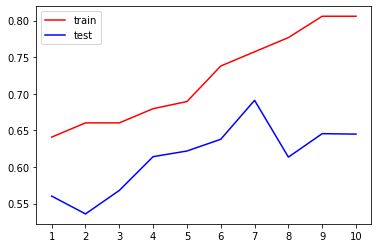

In [8]:
import matplotlib.pyplot as plt

tr = []
te = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(random_state=10
                                 ,max_depth=i+1
                                 ,criterion="entropy",
                                 min_samples_split = 8
                                )
    clf = clf.fit(Xtrain,Ytrain)
    score_tr = clf.score(Xtrain, Ytrain)
    score_te = cross_val_score(clf,train_data,train_label,cv=10).mean()
    tr.append(score_tr)
    te.append(score_te)
print(max(te))
plt.plot(range(1,11),tr,color="red",label="train")
plt.plot(range(1,11),te,color="blue",label="test")
plt.xticks(range(1,11))
plt.legend()
plt.show()


In [9]:
# from sklearn.model_selection import GridSearchCV
# gini_thresholds = np.linspace(0,2,20)

# parameters = {'splitter':('best','random')
#                 ,'criterion':("gini","entropy")
#                 ,"max_depth":[*range(1,10)]
#                 ,'min_samples_leaf':[*range(1,50,5)]
#                 ,'min_impurity_decrease':[*np.linspace(0,0.5,20)]
#              }
# clf = tree.DecisionTreeClassifier(random_state=25)
# GS = GridSearchCV(clf,parameters,cv=10)
# GS.fit(Xtrain,Ytrain)

# GS.best_params_
# GS.best_score_


In [22]:
clf = tree.DecisionTreeClassifier(criterion="entropy",
                                splitter="random",
                                max_depth=5,) #实例化
clf = clf.fit (Xtrain, Ytrain) #用训练集数据训练模型
result = clf.score(Xtest,Ytest)	#导入测试集，从接口中调用需要的信息

result

0.7692307692307693

In [23]:
with open("model.dot", 'w') as f:
    f = tree.export_graphviz(clf, out_file=f)

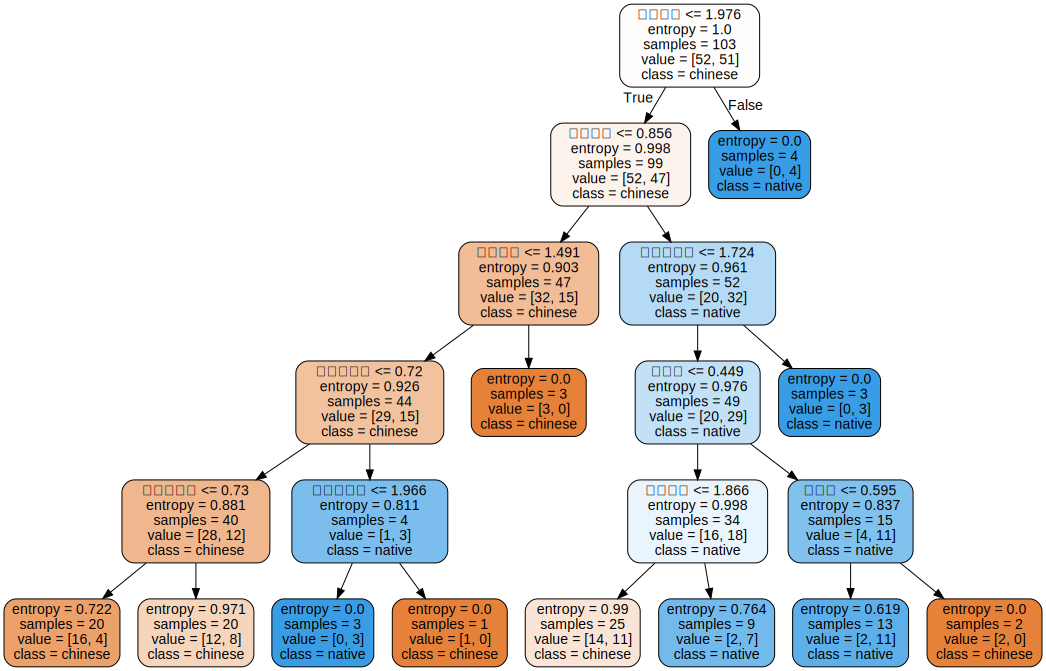

In [24]:
feature_name = ["谓语数目","非谓语数目","副词个数","从句个数","插入语个数","复合句","简单句","并列句","被动词个数","连词个数"]
import graphviz
dot_data = tree.export_graphviz(clf,
                                out_file=None,
                                feature_names=feature_name,
                                class_names=["chinese","native"],
                                filled=True,
                                rounded=True)
                                
graph = graphviz.Source(dot_data)
graph

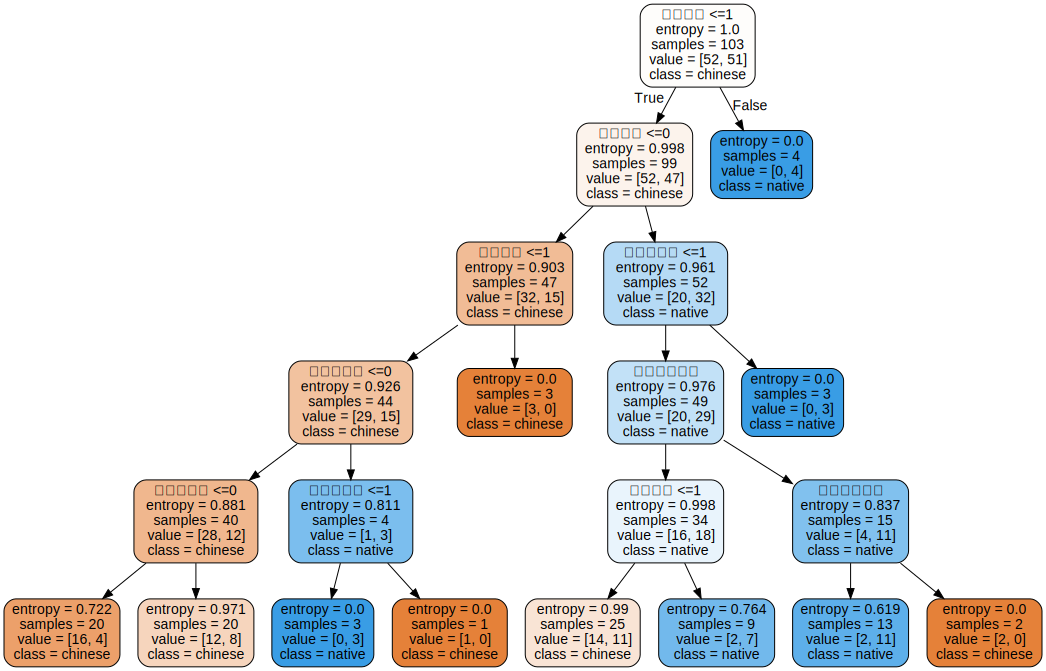

In [25]:
f = open('dot_data.txt', 'w')
f.write(dot_data)
f.close()  
f_new = open('dot_data.txt', 'r', encoding='utf-8')
new_dot = ''
for line in f_new:   
    string = line
    num = re.findall(r"<= \d+\.?\d*",string)
    for n in num:
        n = n.replace('<=','')
        line = line.replace(n,str(int(float(n))))
        #line = line.replace('<=0','== 0')
        line = line.replace('复合句 <=0','是否为复合句')
        line = line.replace('简单句 <=0','是否为简单句')
        line = line.replace('并列句 <=0','是否为并列句')
    new_dot += line

#print(new_dot)

graph = graphviz.Source(new_dot)
graph